In [1]:
import csv
import matplotlib.pyplot as plt

In [ ]:
# 부산청(101) = [부산항유도등부표(01), 북형제도등대(02), 생도등표(03)]   ex) 부산항유도등부표 = 10101
# 동해청(111) = [묵호항동방파제등대(01), 주문진항동방파제등대(02)]       ex) 묵호항동방파제등대 = 11101

In [2]:
# Data List
list_10101 = []
list_10102 = []
list_10103 = []
list_11101 = []
list_11102 = []
# Header List
header_10101 = []
header_10102 = []
header_10103 = []
header_11101 = []
header_11102 = []


In [3]:
def readCSV():
    location = 'C:/Users/KETI/Desktop/git/SmartBuoy/SampleData'
    file_status = 'status.csv'
    file_weather = 'weather.csv'

    temp = []
    header = []

    first_loop_10101 = True
    first_loop_10102 = True
    first_loop_10103 = True
    first_loop_11101 = True
    first_loop_11102 = True
    with open(file_status, 'r') as file:
        reader = csv.reader(file)

        for row in reader:
            if '지방청' in row[0]:
                header = row

            elif '부산항' in row[1]:
                count = 4
                for val in row[4:]:
                    if len(val) > 0:
                        temp.append(float(val))
                        if first_loop_10101: #헤더 추출
                            header_10101.append(header[count])
                    count += 1
                first_loop_10101 = False
                list_10101.append(temp)
                temp = []


            elif '북형제' in row[1]:
                count = 4
                for val in row[4:]:
                    if len(val) > 0:
                        temp.append(float(val))
                        if first_loop_10102:  # 헤더 추출
                            header_10102.append(header[count])
                    count += 1
                first_loop_10102 = False
                list_10102.append(temp)
                temp = []

            elif '생도등표' in row[1]:
                count = 4
                for val in row[4:]:
                    if len(val) > 0:
                        temp.append(float(val))
                        if first_loop_10103:  # 헤더 추출
                            header_10103.append(header[count])
                    count += 1
                first_loop_10103 = False
                list_10103.append(temp)
                temp = []

            elif '묵호항' in row[1]:
                count = 4
                for val in row[4:]:
                    if len(val) > 0:
                        temp.append(float(val))
                        if first_loop_11101:  # 헤더 추출
                            header_11101.append(header[count])
                    count += 1
                first_loop_11101 = False
                list_11101.append(temp)
                temp = []

            elif '주문진항' in row[1]:
                count = 4
                for val in row[4:]:
                    if len(val) > 0:
                        temp.append(float(val))
                        if first_loop_11102:  # 헤더 추출
                            header_11102.append(header[count])
                    count += 1
                first_loop_11102 = False
                list_11102.append(temp)
                temp = []


In [4]:
def sortList(list):
    # 오름차순
    list.sort(key=lambda x: x[0])

    # 내림차순
    #list.sort(key=lambda x: -x[0])

In [8]:
def makePlot(list, header_list, header_str):
    x = []
    y = []

    index = header_list.index(header_str)
    print('Parameter : ', header_str)
    print('Header index : ', index)
    print('Data : ', len(list))
    for raw in list:
        #date = datetime(year=int(raw[0][0:4]), mont=int(raw[0][4:6]), day=int(raw[6:8]))
        x.append(raw[0])
        y.append(raw[index])
    plt.plot(x, y)
    plt.title(header_str)   


등대 입력 :  주문진항


Header list :  ['COLCT_DT', 'LATITUDE', 'LONGITUDE', 'LANTERN_STATUS', 'SPARE_STATUS', 'MAIN_VOLT_STATUS', 'SOLAR_VOLT_STATUS', 'BATTERY_VOLT_STATUS', 'SPARE_VOLT_STATUS', 'AIS_CURR_STATUS', 'LANTERN_CURR_STATUS', 'DATALOGGER_CURR_STATUS', 'CHARGER_CURR_STATUS', 'COLCT_DT', 'LATITUDE', 'LONGITUDE', 'LANTERN_STATUS', 'SPARE_STATUS', 'MAIN_VOLT_STATUS', 'SOLAR_VOLT_STATUS', 'BATTERY_VOLT_STATUS', 'SPARE_VOLT_STATUS', 'AIS_CURR_STATUS', 'LANTERN_CURR_STATUS', 'DATALOGGER_CURR_STATUS', 'CHARGER_CURR_STATUS', 'COLCT_DT', 'LATITUDE', 'LONGITUDE', 'LANTERN_STATUS', 'SPARE_STATUS', 'MAIN_VOLT_STATUS', 'SOLAR_VOLT_STATUS', 'BATTERY_VOLT_STATUS', 'SPARE_VOLT_STATUS', 'AIS_CURR_STATUS', 'LANTERN_CURR_STATUS', 'DATALOGGER_CURR_STATUS', 'CHARGER_CURR_STATUS']


파라미터 입력 :  BATTERY_VOLT_STATUS


Parameter :  BATTERY_VOLT_STATUS
Header index :  7
Data :  68865


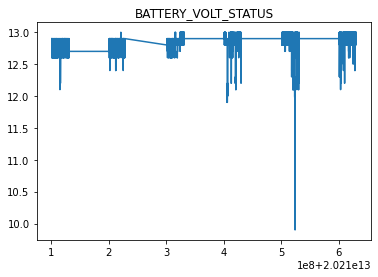

In [10]:
if __name__ == '__main__':
    readCSV()
    list_name = input('등대 입력 : ')

    if '부산항' in list_name:
        list = list_10101
        header_list = header_10101

    elif '북형제' in list_name:
        list = list_10102
        header_list = header_10102

    elif '생도등표' in list_name:
        list = list_10103
        header_list = header_10103

    elif '묵호항' in list_name:
        list = list_11101
        header_list = header_11101

    elif '주문진항' in list_name:
        list = list_11102
        header_list = header_11102

    print('Header list : ', header_list)
    
    header_str = input('파라미터 입력 : ')
    sortList(list)
    makePlot(list, header_list, header_str)